In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# read the data of increae case
case_by_date_data= pd.read_csv("../data/increase_case_by_date.csv")
#read the data of stock index
stock_by_date_data = pd.DataFrame( pd.read_csv("../data/stock_shanghai.csv"),columns=["date","close","volume"])
#convert the format of date and  increase
case_by_date_data["date"] ="0"+ case_by_date_data["date"]+"20"
case_by_date_data["date"]
stock_by_date_data["increase"] = 'null'
case_by_date_data

,date,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China
0,01/23/2020,99.0,1.0,2.0,95.0,1.0,2.0
1,01/24/2020,287.0,8.0,6.0,277.0,8.0,6.0
2,01/25/2020,493.0,16.0,3.0,486.0,16.0,3.0
3,01/26/2020,684.0,14.0,13.0,669.0,14.0,10.0
4,01/27/2020,809.0,26.0,9.0,802.0,26.0,9.0
...,...,...,...,...,...,...,...
108,05/10/2020,77690.0,3398.0,33356.0,20.0,0.0,40.0
109,05/11/2020,75803.0,3621.0,47229.0,1.0,0.0,31.0
110,05/12/2020,84245.0,5612.0,37205.0,7.0,0.0,24.0
111,05/13/2020,85271.0,5255.0,55133.0,6.0,0.0,24.0


In [3]:

case_by_date_data.describe()

,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,39306.265487,2676.115044,14051.902655,738.769912,40.884956,701.176991
std,37417.952408,2813.106042,16249.474657,1793.753253,127.549273,910.902743
min,99.000000,1.000000,2.000000,0.000000,0.000000,-849.000000
25%,2358.000000,94.000000,1663.000000,25.000000,0.000000,76.000000
50%,27756.000000,1123.000000,3410.000000,80.000000,6.000000,261.000000
75%,77609.000000,5437.000000,26950.000000,458.000000,42.000000,1257.000000
max,99113.000000,8858.000000,65461.000000,15136.000000,1290.000000,3995.000000


In [4]:
stock_by_date_data.describe()

,close,volume
count,71.000000,7.100000e+01
mean,2865.648970,2.807148e+10
std,95.171655,7.201583e+09
min,2660.167400,1.771246e+10
25%,2792.942450,2.259287e+10
50%,2860.082200,2.520195e+10
75%,2925.192300,3.310625e+10
max,3071.677000,4.690496e+10


In [5]:
# get the  increase of the data 
for i in range(0,len(stock_by_date_data)):
    if i == 0:
        stock_by_date_data['increase'][i] = 0
    else:
        
        stock_by_date_data['increase'][i] = float((stock_by_date_data['close'][i] - stock_by_date_data['close'][i-1])/stock_by_date_data['close'][i-1])

/Users/koko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/koko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
# get the recovered ratio
case_by_date_data["recovered_ratio_global"] = case_by_date_data["recovered_cases_global"]/case_by_date_data["confirmed_cases_global"]
case_by_date_data["recovered_ratio_China"] = case_by_date_data["recovered_cases_China"]/case_by_date_data["confirmed_cases_global"]




In [7]:
# summary the stock price



/Users/koko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([0.00102679, 0.        , 0.        , 0.00102679, 0.00102679,
        0.00205359, 0.00410717, 0.00205359, 0.00616076, 0.00205359,
        0.00205359, 0.00718755, 0.00308038, 0.00308038, 0.00205359,
        0.00616076, 0.00410717, 0.00513397, 0.00102679, 0.00205359,
        0.00102679, 0.        , 0.00308038, 0.00308038, 0.00308038,
        0.00205359, 0.00102679, 0.00308038, 0.        , 0.00102679]),
 array([2660.1674    , 2673.88438667, 2687.60137333, 2701.31836   ,
        2715.03534667, 2728.75233333, 2742.46932   , 2756.18630667,
        2769.90329333, 2783.62028   , 2797.33726667, 2811.05425333,
        2824.77124   , 2838.48822667, 2852.20521333, 2865.9222    ,
        2879.63918667, 2893.35617333, 2907.07316   , 2920.79014667,
        2934.50713333, 2948.22412   , 2961.94110667, 2975.65809333,
        2989.37508   , 3003.09206667, 3016.80905333, 3030.52604   ,
        3044.24302667, 3057.96001333, 3071.677     ]),
 <a list of 30 Patch objects>)

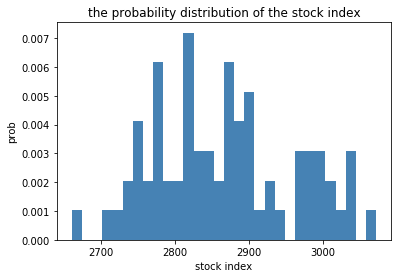

In [8]:
plt.title("the probability distribution of the stock index")
plt.xlabel("stock index")
plt.ylabel('prob')
plt.hist(stock_by_date_data.close, bins=30, color='steelblue', normed=True )


In [9]:
# convert to datetime
stock_by_date_data["date"] = pd.to_datetime(stock_by_date_data["date"],format="%Y-%m-%d")
case_by_date_data["date"] = pd.to_datetime(case_by_date_data["date"],format="%m/%d/%Y")


In [10]:
# convert the data type of increase from object to float
stock_by_date_data["increase"] = stock_by_date_data.increase.astype(float)

In [11]:
# create a new table 
merged_data = pd.merge(stock_by_date_data,case_by_date_data,on="date")
# normalize the data
merged_data_norm=merged_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


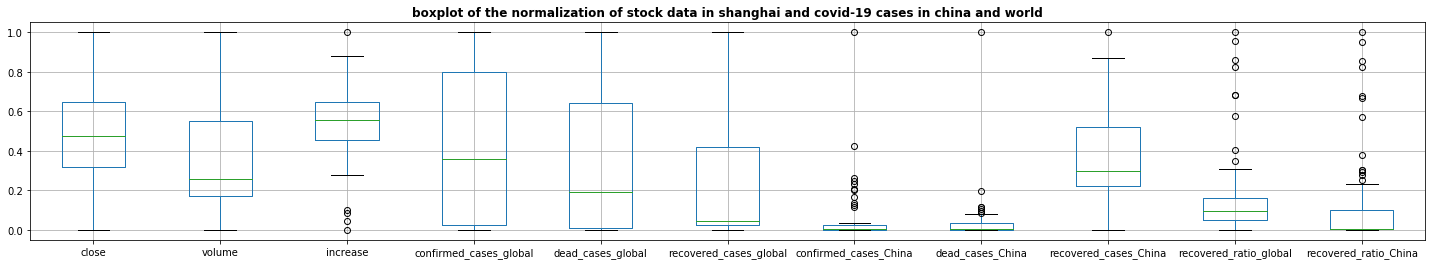

,date,close,volume,increase,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China,recovered_ratio_global,recovered_ratio_China
date,1.000000,-0.353458,-0.645375,-0.070137,0.913452,0.853774,0.890449,-0.468799,-0.111139,-0.600516,-0.292889,-0.468333
close,-0.353458,1.000000,0.638268,0.172327,-0.517251,-0.466334,-0.226508,0.077334,0.097564,0.657120,0.633589,0.637389
volume,-0.645375,0.638268,1.000000,-0.074558,-0.789996,-0.739800,-0.641679,0.052646,0.049308,0.815473,0.517319,0.613855
increase,-0.070137,0.172327,-0.074558,1.000000,0.011640,0.050039,0.046154,0.057908,0.075378,-0.086385,-0.005831,-0.018001
confirmed_cases_global,0.913452,-0.517251,-0.789996,0.011640,1.000000,0.959164,0.859605,-0.316455,-0.038990,-0.752747,-0.396233,-0.549254
dead_cases_global,0.853774,-0.466334,-0.739800,0.050039,0.959164,1.000000,0.825635,-0.323476,0.053977,-0.726116,-0.343315,-0.494523
recovered_cases_global,0.890449,-0.226508,-0.641679,0.046154,0.859605,0.825635,1.000000,-0.290332,-0.075322,-0.606350,-0.193282,-0.392177
confirmed_cases_China,-0.468799,0.077334,0.052646,0.057908,-0.316455,-0.323476,-0.290332,1.000000,0.216998,0.081610,-0.129771,-0.045278
dead_cases_China,-0.111139,0.097564,0.049308,0.075378,-0.038990,0.053977,-0.075322,0.216998,1.000000,-0.071167,0.061083,0.080217
recovered_cases_China,-0.600516,0.657120,0.815473,-0.086385,-0.752747,-0.726116,-0.606350,0.081610,-0.071167,1.000000,0.664863,0.745828


In [12]:
# create and save boxplot
fig = plt.figure(figsize=(25,4)) 
merged_data_norm.iloc[:,1:].boxplot()

plt.savefig("boxplot.jpg")
plt.title('boxplot of the normalization of stock data in shanghai and covid-19 cases in china and world',fontsize='large',fontweight='bold')
plt.show()
# get the correlation coefficient
merged_data_norm.corr()


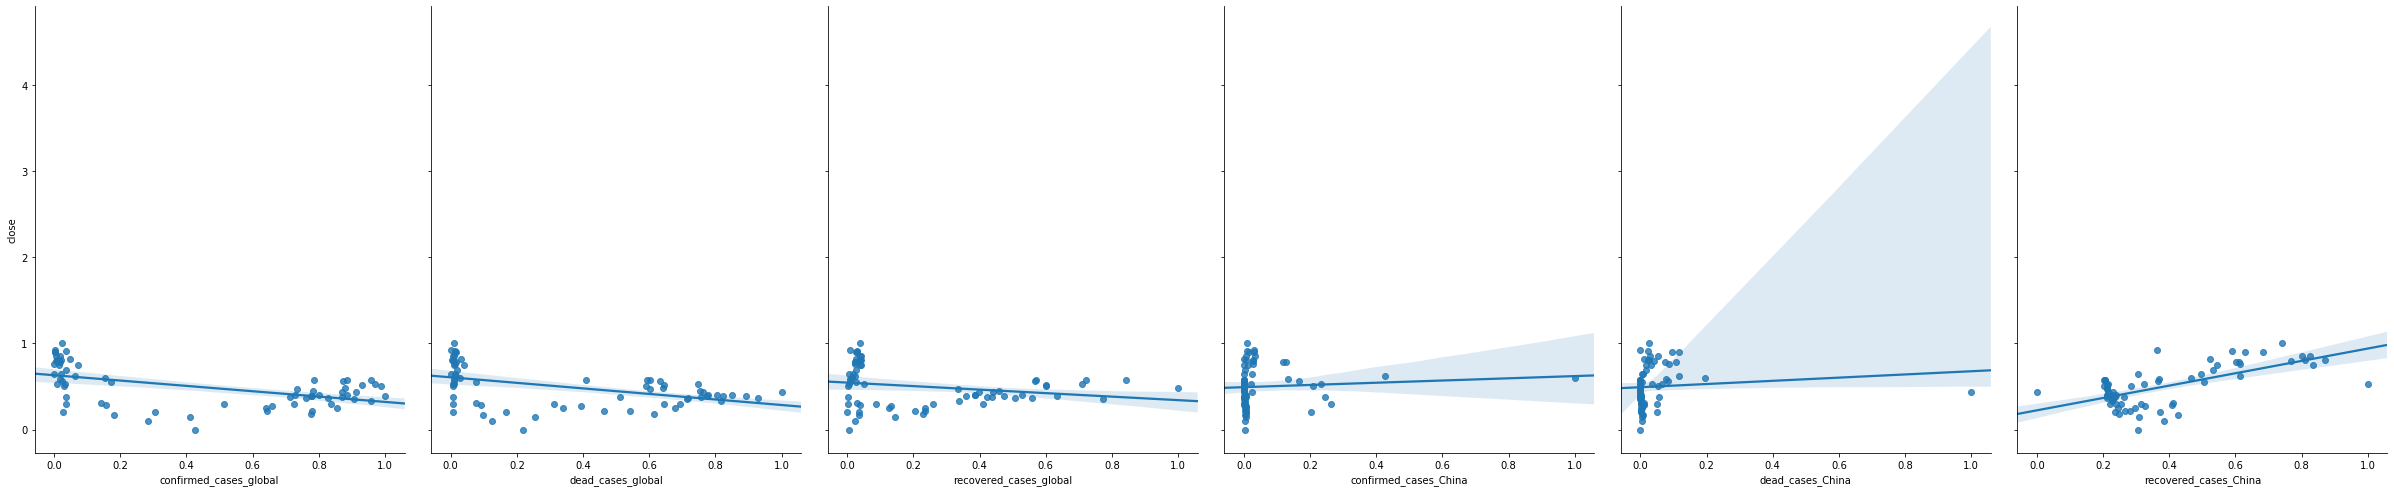

In [13]:
# create scatter plot based on the correlation coefficient
sns.pairplot(merged_data_norm, x_vars=['confirmed_cases_global','dead_cases_global','recovered_cases_global','confirmed_cases_China','dead_cases_China','recovered_cases_China'], y_vars='close', height=7, aspect=0.8,kind = 'reg')
plt.savefig("scatter plot.jpg")






In [14]:
# anova-China
formula = 'close~ confirmed_cases_global + dead_cases_global+recovered_cases_global+confirmed_cases_China+dead_cases_China+recovered_cases_China + recovered_ratio_global + recovered_ratio_China'
anova_results = anova_lm(ols(formula,merged_data_norm).fit())
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
confirmed_cases_global,1.0,1.001729,1.001729,43.667676,1.087517e-08
dead_cases_global,1.0,0.041543,0.041543,1.810964,1.833733e-01
recovered_cases_global,1.0,0.679712,0.679712,29.630197,9.835246e-07
confirmed_cases_China,1.0,0.017105,0.017105,0.745650,3.912396e-01
dead_cases_China,1.0,0.040988,0.040988,1.786775,1.862839e-01
recovered_cases_China,1.0,0.498915,0.498915,21.748836,1.741343e-05
recovered_ratio_global,1.0,0.064487,0.064487,2.811153,9.872920e-02
recovered_ratio_China,1.0,0.000295,0.000295,0.012861,9.100801e-01
Residual,61.0,1.399329,0.022940,NaN,NaN


In [15]:
merged_data_norm

,date,close,volume,increase,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China,recovered_ratio_global,recovered_ratio_China
0,0.000000,0.210050,0.132868,0.541199,0.027879,0.006777,0.000000,0.203832,0.049612,0.235405,0.010303,0.015858
1,0.009901,0.299190,0.640307,0.735940,0.037437,0.007002,0.001194,0.263627,0.051163,0.253766,0.012560,0.018106
2,0.019802,0.383757,0.454354,0.723514,0.034643,0.007680,0.001853,0.246581,0.055814,0.263889,0.016799,0.022330
3,0.029703,0.501426,0.477066,0.791746,0.028557,0.007454,0.003246,0.207863,0.054264,0.285075,0.028298,0.033701
4,0.039604,0.524400,0.453387,0.589290,0.033122,0.009148,0.005711,0.232706,0.065891,0.322740,0.036673,0.041981
...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.940594,0.571498,0.170241,0.662162,0.958082,0.601649,0.568948,0.000000,0.000000,0.203625,0.106995,0.002668
66,0.970297,0.570180,0.164412,0.538467,0.785667,0.408516,0.720839,0.000000,0.000000,0.207156,0.166618,0.002732
67,0.980198,0.562293,0.068368,0.524851,0.873652,0.633386,0.567356,0.000396,0.000000,0.205508,0.117234,0.002699
68,0.990099,0.578072,0.027188,0.573942,0.884345,0.593065,0.841862,0.000330,0.000000,0.205508,0.173019,0.002698


In [16]:
# time series analysis
#get the len of data
len_rows = merged_data.shape[0]
# use 0.9 as train and 0.1 as test
split_point = int(len_rows * 0.8)
y_train = merged_data_norm.iloc[:split_point,[1]]
x_train = merged_data_norm.iloc[:split_point,[4,9,10]]
y_test = merged_data_norm.iloc[split_point:,[1]]
x_test = merged_data_norm.iloc[split_point:,[4,9,10]]


y_train2 =  merged_data_norm.iloc[:split_point,[2]]
y_test2 =  merged_data_norm.iloc[split_point:,[2]]

## X = add_constant(x_train)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [17]:
linreg = LinearRegression()
 
model= linreg.fit(x_train,y_train)
 
a  = linreg.intercept_#intercept
 
b = linreg.coef_#Regression coefficients

b


array([[-0.19899411,  0.34849017,  0.32447878]])

In [18]:
# validation
y_pred = linreg.predict(x_test)

print(len(y_pred))
print(len(y_test))

14
14


In [19]:
# calculate RMSE 
sum_mean=0
for i in range(len(y_test)):
        sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  

sum_erro

array([0.19639009])

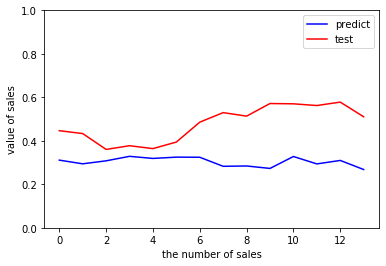

In [20]:
#ROC graph

plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_test)),y_test,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.ylim(0,1)
plt.show()

In [21]:

model= linreg.fit(x_train,y_train2)
 
a  = linreg.intercept_#intercept
 
b = linreg.coef_#Regression coefficients

b

array([[-0.27922668,  0.54286978,  0.03347779]])

In [22]:
# validation
y_pred = linreg.predict(x_test)
print(len(y_test2))
# calculate RMSE 
sum_mean=0
for i in range(len(y_test2)):
        sum_mean+=(y_pred[i]-y_test2.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  

sum_erro

14


array([0.07741381])

In [23]:
# get the date data
merged_data_norm["date"]= merged_data["date"]
merged_data_norm.set_index("date",inplace=True)

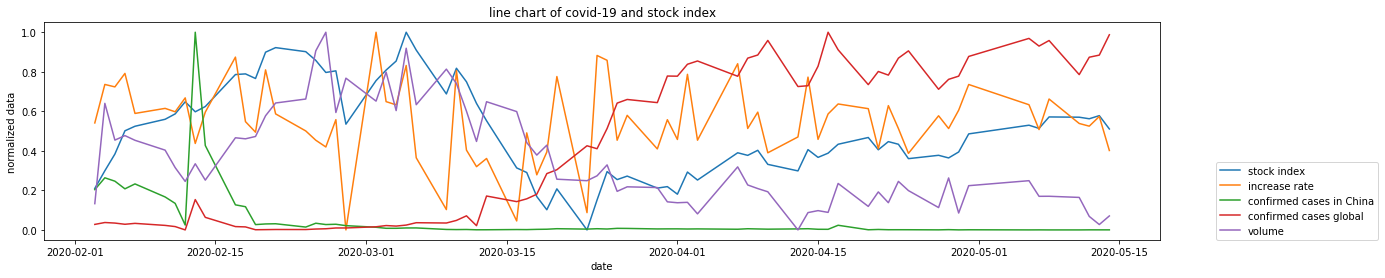

In [24]:
#Draw a line chart
fig = plt.figure(figsize=(20,4)) 
plt.plot(merged_data_norm["close"],label="stock index")
plt.plot(merged_data_norm["increase"],label="increase rate")
plt.plot(merged_data_norm["confirmed_cases_China"],label="confirmed cases in China")
plt.plot(merged_data_norm["confirmed_cases_global"],label="confirmed cases global")
plt.plot(merged_data_norm["volume"],label="volume")
plt.title("line chart of covid-19 and stock index")
plt.xlabel("date")
plt.ylabel("normalized data")
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()

In [25]:
# for different sectors
stock_by_industry_data = pd.DataFrame(pd.read_csv("../data/stock_firstindex.csv"),columns=["code","date","close","volume",])
stock_by_industry_data

,code,date,close,volume
0,sh.000032,2020-02-03,1094.3880,1056120496
1,sh.000032,2020-02-04,1097.1840,1310307904
2,sh.000032,2020-02-05,1102.0050,1035694896
3,sh.000032,2020-02-06,1115.6870,956049600
4,sh.000032,2020-02-07,1112.6180,821746896
...,...,...,...,...
1415,sh.000113,2020-05-11,1928.0034,182509000
1416,sh.000113,2020-05-12,1919.3075,146030000
1417,sh.000113,2020-05-13,1935.7202,144992200
1418,sh.000113,2020-05-14,1918.7947,124547300


In [26]:
case_by_date_data

,date,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China,recovered_ratio_global,recovered_ratio_China
0,2020-01-23,99.0,1.0,2.0,95.0,1.0,2.0,0.020202,0.020202
1,2020-01-24,287.0,8.0,6.0,277.0,8.0,6.0,0.020906,0.020906
2,2020-01-25,493.0,16.0,3.0,486.0,16.0,3.0,0.006085,0.006085
3,2020-01-26,684.0,14.0,13.0,669.0,14.0,10.0,0.019006,0.014620
4,2020-01-27,809.0,26.0,9.0,802.0,26.0,9.0,0.011125,0.011125
...,...,...,...,...,...,...,...,...,...
108,2020-05-10,77690.0,3398.0,33356.0,20.0,0.0,40.0,0.429347,0.000515
109,2020-05-11,75803.0,3621.0,47229.0,1.0,0.0,31.0,0.623049,0.000409
110,2020-05-12,84245.0,5612.0,37205.0,7.0,0.0,24.0,0.441629,0.000285
111,2020-05-13,85271.0,5255.0,55133.0,6.0,0.0,24.0,0.646562,0.000281


In [27]:
# merge data
stock_by_industry_data["date"] = pd.to_datetime(stock_by_industry_data["date"],format="%Y-%m-%d")
merged_diff_data = pd.merge(stock_by_industry_data,case_by_date_data,on="date")


In [28]:
a= []
for code,codedata in merged_diff_data.groupby('code'):
#     print("code",code)
#     print(codedata.iloc[:,1:])
    #get the normalize data
    # normalize the data
#     print(codedata)
    codedata_norm=codedata.iloc[:,2:].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#     codedata["date"] = codedata_norm["date"]
    code_X = codedata_norm.iloc[:,[2,7,8]]
#     print(code_X)
    code_Y = codedata_norm.iloc[:,0]
  
    linreg = LinearRegression()
    model= linreg.fit(code_X,code_Y)
    b = list(linreg.coef_)
    b.append(code)
    a.append(b)
print(len(a))
df_a = pd.DataFrame(a,columns=['confirmed_cases_global','recovered_cases_China','recovered_ratio_global','code'])
df_a
    

    


20


,confirmed_cases_global,recovered_cases_China,recovered_ratio_global,code
0,-0.578599,0.152707,0.166588,sh.000032
1,-0.133817,0.371597,0.380406,sh.000033
2,0.110840,0.583916,0.202579,sh.000034
3,-0.390236,0.233471,0.381991,sh.000035
4,0.561650,0.127547,0.273332,sh.000036
5,0.390670,-0.110289,0.407933,sh.000037
6,-0.356490,0.044930,0.381908,sh.000038
7,0.004645,0.412130,0.485089,sh.000039
8,0.109616,0.814350,0.036243,sh.000040
9,-0.081437,0.397544,0.206555,sh.000041
